# Setup

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [18]:
# Import the statistics from cross validation
nn_stats = pd.read_csv("Results/nn_TrainTest_100_10pct_full.csv", index_col=0)
boosting_stats = pd.read_csv("Results/boost_TrainTest_100_10pct_full.csv", index_col=0)

# Average the stats across the trials
nn_stats_average = nn_stats.mean()
boosting_stats_average = boosting_stats.mean()

# Compare statistics

In [20]:
# Table with the stats in it
df_compare_stats = pd.DataFrame({"Neural Network":nn_stats_average,
              "NN w/ Boosted Residuals":boosting_stats_average}).transpose()[
                  ["RMSE Train", "RMSE Test",
                   "MAE Train", "MAE Test",
                   "MAPE Train", "MAPE Test"]]
for col in df_compare_stats.columns:
    if "MAPE" in col:
        df_compare_stats[col] = ["{0:.2f}%".format(val * 100) for val in df_compare_stats[col]]
    else:
        df_compare_stats[col] = df_compare_stats[col].round(2)
df_compare_stats = df_compare_stats.transpose()

# Save data table
dfi.export(df_compare_stats, 'Plots/cv_stats_both_methods.png')

df_compare_stats

,Neural Network,NN w/ Boosted Residuals
RMSE Train,5.17,1.76
RMSE Test,5.43,4.83
MAE Train,4.07,1.37
MAE Test,4.27,3.8
MAPE Train,1.48%,0.51%
MAPE Test,1.56%,1.39%


# Compare Testing MAPES

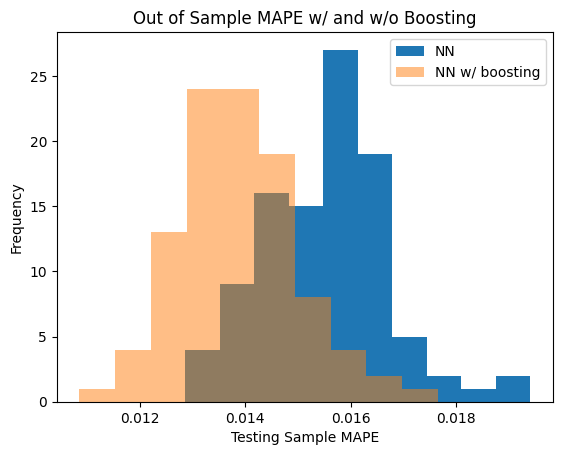

In [21]:
plt.hist(nn_stats["MAPE Test"], label = "NN")
plt.hist(boosting_stats["MAPE Test"], label = "NN w/ boosting", alpha = 0.5)
plt.xlabel("Testing Sample MAPE")
plt.ylabel("Frequency")
plt.title("Out of Sample MAPE w/ and w/o Boosting")
plt.legend()
plt.savefig("Plots/testing_MAPE_comparison")
plt.show()

# Train vs Test

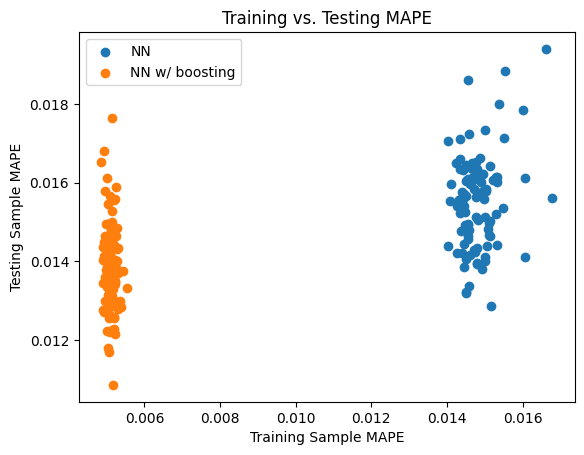

In [22]:
plt.scatter(nn_stats["MAPE Train"], nn_stats["MAPE Test"], label = "NN")
plt.scatter(boosting_stats["MAPE Train"], boosting_stats["MAPE Test"], label = "NN w/ boosting")
plt.xlabel("Training Sample MAPE")
plt.ylabel("Testing Sample MAPE")
plt.title("Training vs. Testing MAPE")
plt.legend()
plt.savefig("Plots/train_vs_testing_MAPE")
plt.show()